In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import FluidicSetupFunctions
import numpy as np
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

In [5]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"\data_analysis"
Foldernames = ["\\Experimental_data\\run3"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\data_analysis\\Experimental_data\\run3'

In [1]:
data[0][1]

NameError: name 'data' is not defined

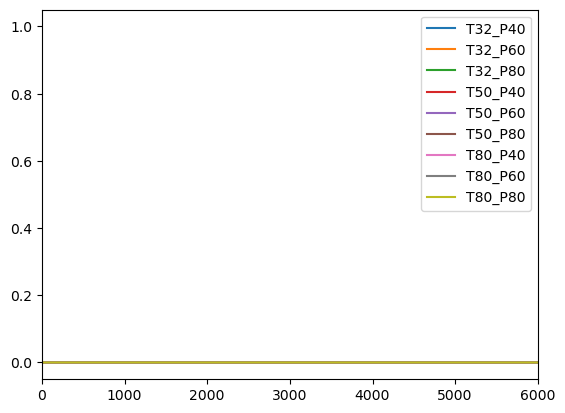

In [12]:
#Make dataframe
df = pd.DataFrame()
T0=np.ones(len(data[0]))*(273+21.7)
T1 = []
p1 = []


#Extract the index where DigOut switches from 1 to 0. This indicates the timestamp when the pressure vessels are dropped in warm water.
first_index = []
samplenames = []
bb = 3000 #Start of the slice operation
for i in range(len(data[0])):
    samplename = data[1]['Samplename'][i]
    plt.plot(data[0][i]['DigOut-1'][:],label=samplename)
    plt.legend()
    indices = np.where(data[0][i]['DigOut-1'][bb:6000]<0.1) 
    first_index.append(indices[0][0]+bb)
    samplenames.append(samplename)
    T1.append(int(samplename[1:3])+273)
    

plt.xlim(0,6000)

#There is an offset in when the vessel was dropped and the DigOut was flipped, that is corrected here
samplenames[7]
first_index[7]=first_index[7]+150

#here the values from the exp, the onews to use later for ideal gas law comparison
p0 = []
p_amb=1e5
for i in range(len(data[0])):
    p0.append(data[0][i]['MPX100-2'].iloc[first_index[i]]+p_amb)
    p1.append(data[0][i]['MPX100-2'].iloc[-1]+p_amb)

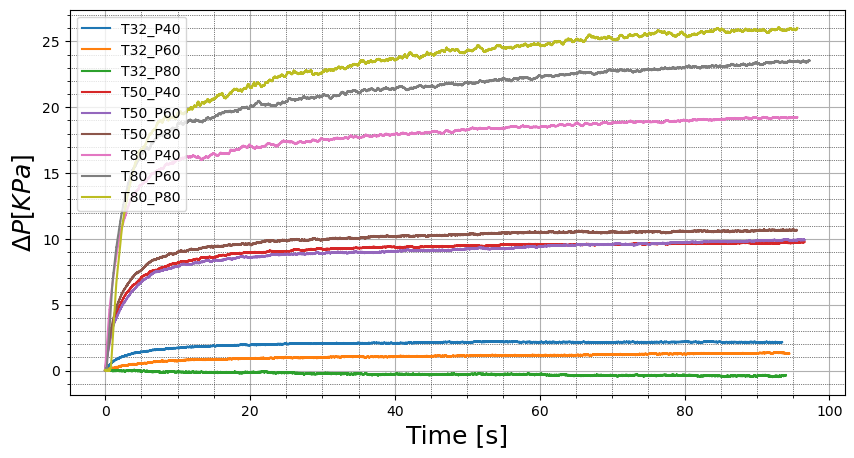

In [13]:
plt.figure(figsize=(10, 5))
p_final =[]
p_start = []
dp=[]
legend_list=[]
linestyles = ['solid']
first_index = [10000,9000,9500,6900,6900,7950,7900,6200,7900]
colors = ['#6C6FFF', '#FF0000','#6C6FFF','#FF9C9C', '#FF0000','#6C6FFF','#FF9C9C', '#FF0000','#FF9C9C']

for idx,index in enumerate(first_index):
    df = data[0][idx]
    samplename = data[1]['Samplename'][idx] 
    legend_list.append(samplename)
    time = df.Time[index:] - df.Time[index] 
    plt.plot(time,df['MPX100-2'][index:]*1/1000-df['MPX100-2'][index]*1/1000,label=samplename,)
    p_final.append(data[0][idx]['MPX100-2'].iloc[-1]*1/1000)
    p_start.append(data[0][idx]['MPX100-2'].iloc[first_index[idx]]*1/1000)
   
    
plt.legend()
plt.grid()
#plt.xlim([2,6])
#plt.ylim([0, 21])
plt.xlabel("Time [s]",fontsize=18 )
plt.ylabel("$\\Delta P [KPa]$", fontsize=18  )
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()


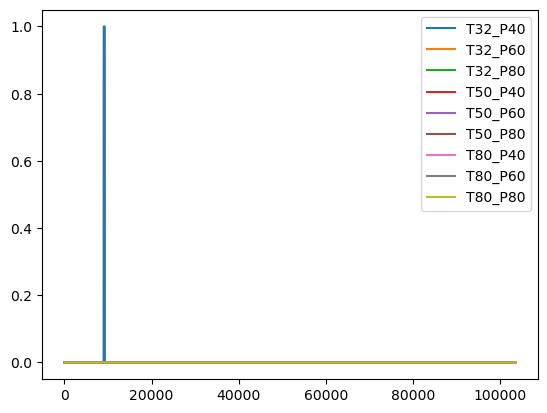

In [14]:
#Finding rising edge with convolution
def rising_edge(data, thresh):
    sign = data >= thresh
    pos = np.where(np.convolve(sign, [1, -1]) == -1)
    return pos

first_index_conv = []
first_index_conv=rising_edge(1-data[0][-2]['DigOut-1'][3000:],1)

#Make dataframe
df = pd.DataFrame()
T0=np.ones(len(data[0]))*(273+21.7)
T1 = []
p1 = []


#Extract the index where DigOut switches from 1 to 0. This indicates the timestamp when the pressure vessels are dropped in warm water.
first_index = []
samplenames = []
bb = 3000 #Start of the slice operation
for i in range(len(data[0])):
    samplename = data[1]['Samplename'][i]
    plt.plot(data[0][i]['DigOut-1'][:],label=samplename)
    plt.legend()
    indices = np.where(data[0][i]['DigOut-1'][bb:6000]<0.1) 
    first_index.append(indices[0][0]+bb)
    samplenames.append(samplename)
    T1.append(int(samplename[1:3])+273)
    

#plt.xlim(0,6000)

#here the values from the exp, the onews to use later for ideal gas law comparison
p0 = []
p_amb=1e5
for i in range(len(data[0])):
    p0.append(data[0][i]['MPX100-2'].iloc[first_index[i]]+p_amb)
    p1.append(data[0][i]['MPX100-2'].iloc[-1]+p_amb)

In [15]:
df = pd.DataFrame({
    'T0': T0,
    'T1': T1,
    'p0': p0,
    'p1': p1,
})

#df.sort_values(by='T1',ascending=True)
df['p1_ideal']=(df['T1']/df['T0'])*df['p0']
df['dp_experiment_ideal']=df['p1_ideal']-df['p1']

#df=df.reset_index()
df.sort_values('T1')
df



,T0,T1,p0,p1,p1_ideal,dp_experiment_ideal
0,294.7,305,76447.30,117335.37,79119.19,-38216.17
1,294.7,305,64334.33,124348.62,66582.87,-57765.75
2,294.7,305,51298.30,129740.01,53091.22,-76648.79
3,294.7,323,75642.68,123711.96,82906.64,-40805.32
4,294.7,323,64010.56,131395.22,70157.48,-61237.74
5,294.7,323,52102.60,140844.71,57106.00,-83738.70
6,294.7,353,76005.47,134076.93,91041.50,-43035.43
7,294.7,353,62235.50,143111.59,74547.45,-68564.15
8,294.7,353,53169.65,155199.28,63688.11,-91511.17


In [16]:
# Initialize the plot
plt.figure()

# Define the color for each pressure range
colors = {'13e4-14e4': 'blue', '15e4-16e4': 'pink', 'other': 'red'}

# Iterate over pressure ranges
for pressure_range, color in colors.items():
    if pressure_range == '13e4-14e4':
        mask = (13e4 <= df['p0']) & (df['p0'] <= 14e4)
    elif pressure_range == '15e4-16e4':
        mask = (15e4 <= df['p0']) & (df['p0'] <= 16e4)
    else:
        mask = ~((13e4 <= df['p0']) & (df['p0'] <= 14e4)) & ~((15e4 <= df['p0']) & (df['p0'] <= 16e4))
    
    # Select the subset of data for this pressure
    subset = df[mask]
    
    # Perform the fit
    fit = np.polyfit(subset['T1'], subset['dp_experiment_ideal'], 1)
    
    # Generate x-values for the fitted line
    x = np.linspace(subset['T1'].min(), subset['T1'].max(), 100)
    
    # Generate y-values for the fitted line
    y = np.polyval(fit, x)
    
    # Plot the data
    plt.scatter(subset['T1'], subset['dp_experiment_ideal'], color=color)
    
    # Plot the fitted line
    plt.plot(x, y, color=color, label=f'p0: {pressure_range}')

# Add a legend
plt.legend()
plt.grid()

# Display the plot
plt.title('Pressure difference between measured and ideal scenario with linear fit')
plt.show()


TypeError: expected non-empty vector for x

<Figure size 640x480 with 0 Axes>

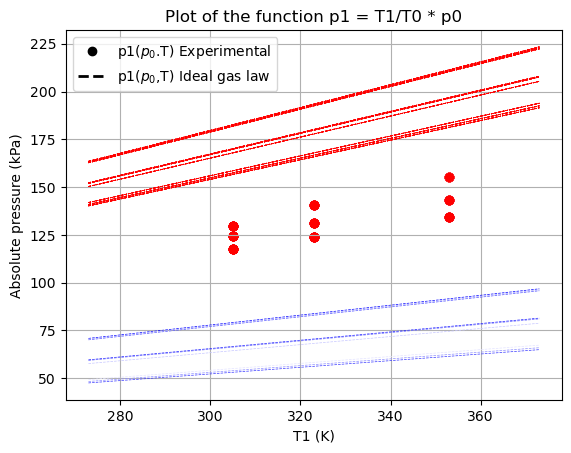

In [ ]:
T =np.linspace(273,(273+100),1000)

for cc in range(len(T0)):
    p1_ideal = T/T0[cc]*(p0[cc]/1000)
    plt.plot(T,p1_ideal,color=(cc/9, cc/9, 1),linestyle ='--' ,lw=1/2)
    plt.scatter(T1[cc],p1[cc]/1000,color=(cc/9, cc/9, 1))

    for cc in range(len(df['T1'])):
        if 13e4 <= df['p0'].iloc[cc] <= 14e4:
            p1_ideal = T/df['T0'].iloc[cc]*((df['p0'].iloc[cc]+p_amb)/1000)
            plt.plot(T,p1_ideal,color='blue',linestyle ='--' ,lw=1/2)
            plt.scatter(T1[cc],p1[cc]/1000,color='blue')
        elif 15e4 <= df['p0'].iloc[cc] <= 16e4:
            p1_ideal = T/df['T0'].iloc[cc]*((df['p0'].iloc[cc]+p_amb)/1000)
            plt.plot(T,p1_ideal,color='pink',linestyle ='--' ,lw=1/2)
            plt.scatter(T1[cc],p1[cc]/1000,color='pink')
        else:
            p1_ideal = T/df['T0'].iloc[cc]*((df['p0'].iloc[cc]+p_amb)/1000)
            plt.plot(T,p1_ideal,color='red',linestyle ='--' ,lw=1/2)
            plt.scatter(T1[cc],p1[cc]/1000,color='red')


plt.xlabel('T1 (K)')
plt.ylabel('Absolute pressure (kPa)')
plt.title('Plot of the function p1 = T1/T0 * p0')
plt.grid(True)

custom_lines = [Line2D([0], [0], color='black', lw=2, marker='o',linestyle='None'),Line2D([0], [0], color='k', linestyle='--', lw=2)]
plt.legend(custom_lines, ['p1($p_0$.T) Experimental', 'p1($p_0$,T) Ideal gas law'])

#plt.xlim(300,360)
#plt.ylim(140,220)
plt.show()


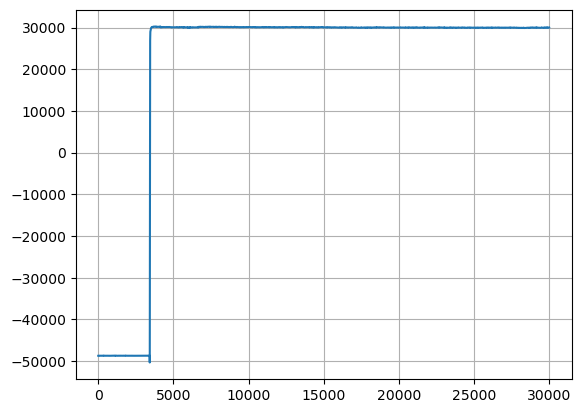

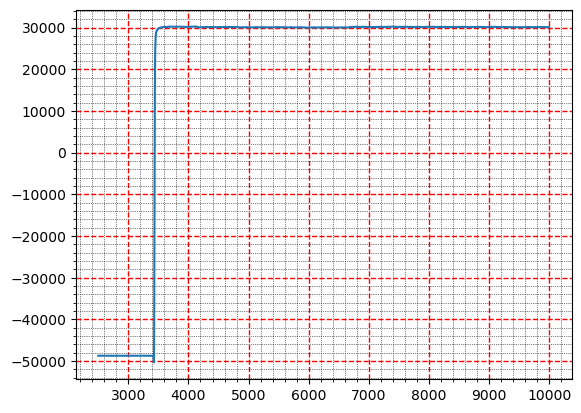

In [ ]:
ee=2
plt.plot(data[0][ee]['MPX100-2'][0:30000])
#plt.ylim(2.7e4,3.2e4)
plt.grid()
plt.show()

plt.plot(data[0][ee]['MPX100-2'][2500:10000])
plt.grid(color='r', linestyle='--', linewidth=1, alpha=0.5)

# Customize the minor grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', alpha=1)
#plt.ylim(2e4,3e4)
plt.show()

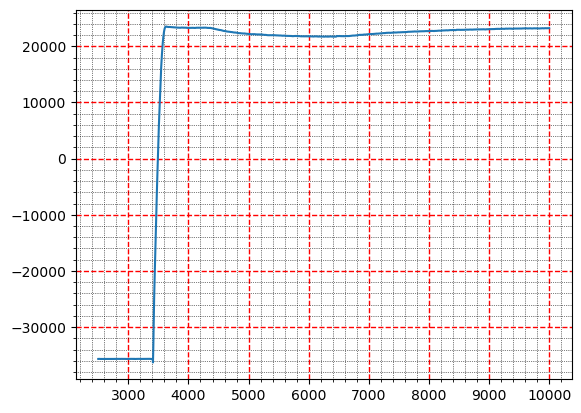